C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


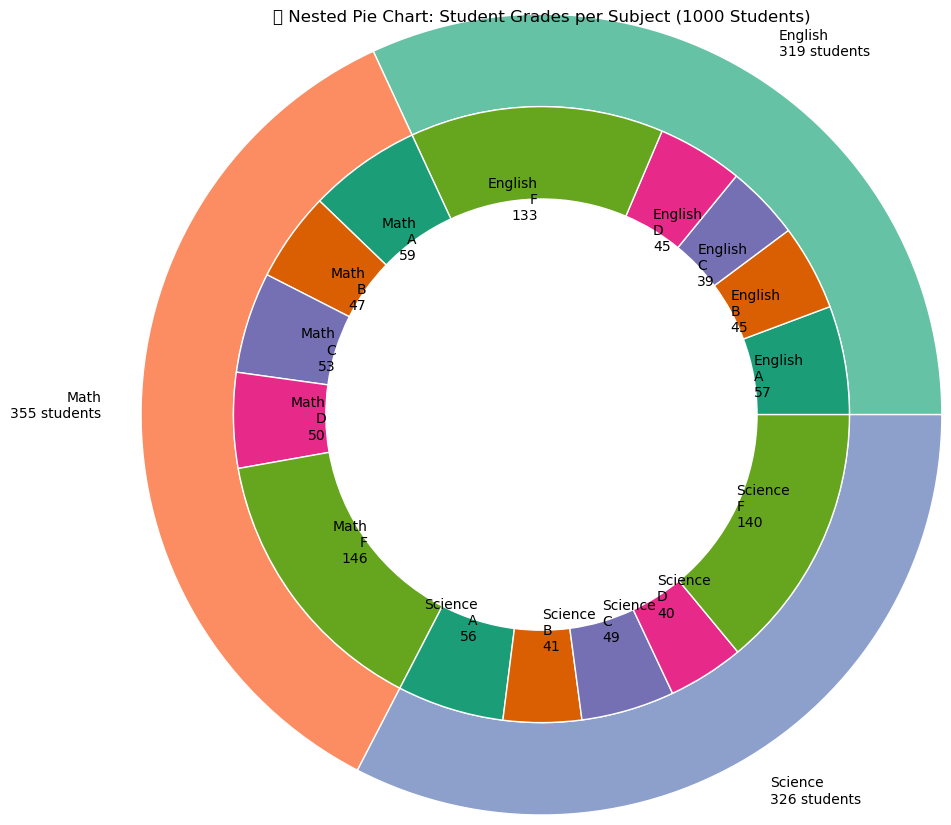

In [2]:
import pandas as pd
import numpy as np

# Simulate data for 1000 students across 3 subjects
np.random.seed(42)
n_students = 1000
subjects = ['Math', 'Science', 'English']
grades = ['A', 'B', 'C', 'D', 'F']

# Create random dataset
data = pd.DataFrame({
    'StudentID': range(1, n_students + 1),
    'Subject': np.random.choice(subjects, n_students),
    'Score': np.random.randint(0, 101, size=n_students)
})

# Assign grades based on score
def grade(score):
    if score >= 85: return 'A'
    elif score >= 70: return 'B'
    elif score >= 55: return 'C'
    elif score >= 40: return 'D'
    else: return 'F'

data['Grade'] = data['Score'].apply(grade)
# Outer ring: total students per subject
outer_data = data.groupby('Subject').size().reset_index(name='Count')

# Inner ring: students per subject per grade
inner_data = data.groupby(['Subject', 'Grade']).size().reset_index(name='Count')
import matplotlib.pyplot as plt

# Outer ring labels and sizes
outer_labels = outer_data['Subject']
outer_sizes = outer_data['Count']
outer_colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Inner ring labels and sizes
inner_labels = inner_data.apply(lambda x: f"{x['Subject']}\n{x['Grade']}\n{x['Count']}", axis=1)
inner_sizes = inner_data['Count']
grade_palette = {
    'A': '#1b9e77', 'B': '#d95f02', 'C': '#7570b3',
    'D': '#e7298a', 'F': '#66a61e'
}
inner_colors = [grade_palette[grade] for grade in inner_data['Grade']]

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('equal')

# Outer pie - Subjects
outer_pie, _ = ax.pie(outer_sizes, radius=1.3,
                      labels=[f"{s}\n{c} students" for s, c in zip(outer_labels, outer_sizes)],
                      colors=outer_colors,
                      wedgeprops=dict(width=0.3, edgecolor='white'))

# Inner pie - Grades
inner_pie, _ = ax.pie(inner_sizes, radius=1.0,
                      labels=inner_labels,
                      colors=inner_colors,
                      wedgeprops=dict(width=0.3, edgecolor='white'),
                      labeldistance=0.7)

plt.title("🎓 Nested Pie Chart: Student Grades per Subject (1000 Students)")
plt.show()